In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Breast Cancer dataset
cancer = load_breast_cancer()

In [ ]:
# Convert to a DataFrame for easy exploration
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data['target'] = cancer.target

In [ ]:
# Check the first few rows
print(data.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
# Check class distribution
print(f"Class Distribution: {data['target'].value_counts()}")

Class Distribution: target
1    357
0    212
Name: count, dtype: int64


In [ ]:
# Split the data into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

In [ ]:
# Fit the scaler on the training data and transform both train and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the KNN model with K=5
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict on the test data
y_pred = knn.predict(X_test)

In [ ]:
# Print the predictions
print("Predicted classes:", y_pred)

Predicted classes: [1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [ ]:
# Generate the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[40  3]
 [ 3 68]]


In [ ]:
report = classification_report(y_test, y_pred, target_names=['Malignant', 'Benign'])
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

   Malignant       0.93      0.93      0.93        43
      Benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



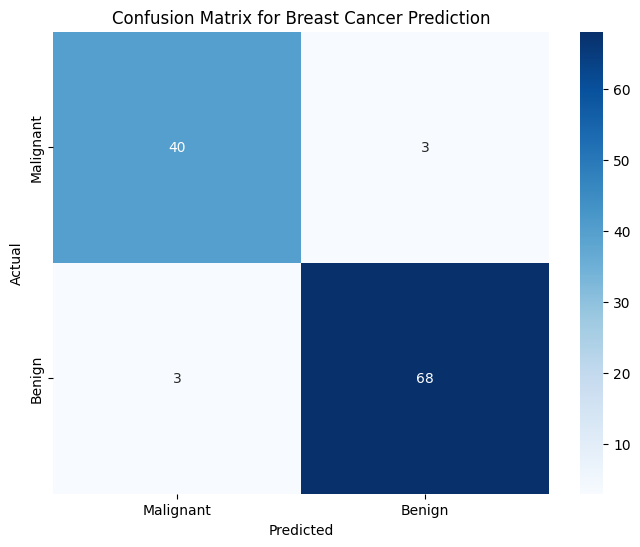

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Breast Cancer Prediction')
plt.show()


In [ ]:
# Try with a different K value (e.g., K=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
# Evaluate with the new K value
print("\nNew Classification Report with K=3:\n", classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))



New Classification Report with K=3:
               precision    recall  f1-score   support

   Malignant       0.93      0.93      0.93        43
      Benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

